In [39]:
from pybhpt.geo import KerrGeodesic
from pybhpt.radial import RadialTeukolsky, teukolsky_starobinsky_const, teukolsky_starobinsky_const_squared, teukolsky_starobinsky_transformation_amplitude
from pybhpt.teuk import TeukolskyMode
from pybhpt.hertz import HertzMode
import numpy as np
import matplotlib.pyplot as plt

In [72]:
m = 2
geo = KerrGeodesic(0.5, 10., 0., 1.0, 2**2)
lmodes = np.arange(m, 30)
jmodes = np.arange(m, 50)
hertz_in = np.zeros((lmodes.shape[0], 3), dtype=np.complex128)
hertz_up = np.zeros((lmodes.shape[0], 3), dtype=np.complex128)
dhertz_in = np.zeros((lmodes.shape[0], 3), dtype=np.complex128)
dhertz_up = np.zeros((lmodes.shape[0], 3), dtype=np.complex128)
ddhertz_in = np.zeros((lmodes.shape[0], 3), dtype=np.complex128)
ddhertz_up = np.zeros((lmodes.shape[0], 3), dtype=np.complex128)
for j in jmodes:
    teuk = TeukolskyMode(-2, j, m, 0, 0, geo)
    teuk.solve(geo)
    hertz = HertzMode(teuk, "IRG")
    hertz.solve()
    Rright = RadialTeukolsky(teuk.blackholespin, -2, j, m, teuk.frequency, np.array([10., 14., 20.]))
    Rleft = RadialTeukolsky(teuk.blackholespin, -2, j, m, teuk.frequency, np.array([6., 8., 10.]))
    Rright.solve(bc='Up')
    Rleft.solve(bc='In')
    Rup = np.array([Rright.solution('Up', i) for i in range(3)])
    Rin = np.array([Rleft.solution('In', i) for i in range(3)])
    dRup = np.array([Rright.derivative('Up', i) for i in range(3)])
    dRin = np.array([Rleft.derivative('In', i) for i in range(3)])
    ddRup = np.array([Rright.derivative2('Up', i) for i in range(3)])
    ddRin = np.array([Rleft.derivative2('In', i) for i in range(3)])
    for l in lmodes:
        PsiIn = hertz.couplingcoefficient(l)*hertz.hertz_amplitude('In')
        hertz_in[l-m] += PsiIn*Rin
        dhertz_in[l-m] += PsiIn*dRin
        ddhertz_in[l-m] += PsiIn*ddRin
        PsiUp = hertz.couplingcoefficient(l)*hertz.hertz_amplitude('Up')
        hertz_up[l-m] += PsiUp*Rup
        dhertz_up[l-m] += PsiUp*dRup
        ddhertz_up[l-m] += PsiUp*ddRup

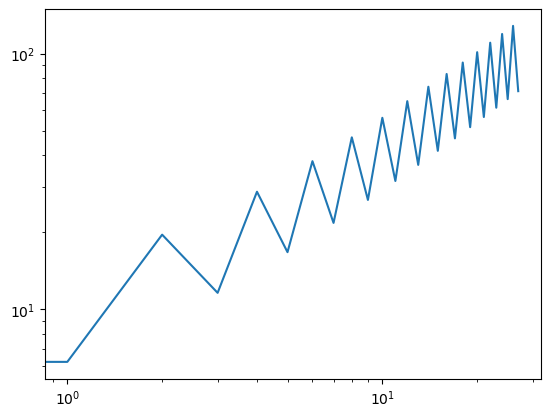

In [75]:
plt.plot(np.abs(hertz_up[:, 0]))
plt.yscale('log')
plt.xscale('log')

In [88]:
geo = KerrGeodesic(0., 6., 0., 1.0, 2**2)
m = 2
teuk = TeukolskyMode(-2, m, m, 0, 0, geo)
teuk.solve(geo)
print(teuk.teukolsky_amplitude('Up'),
      teuk.teukolsky_amplitude('Up')/geo.mode_frequency(np.array([0, 0, m]))**2, 
      geo.mode_frequency(np.array([0, 0, m]))**2)

(0.008763124395559884-0.0029491293311720355j) (0.47320871736023334-0.1592529838832898j) 0.018518518518518535


In [89]:
geo = KerrGeodesic(0.25, 6., 0., 1.0, 2**2)
m = 2
teuk = TeukolskyMode(-2, m, m, 0, 0, geo)
teuk.solve(geo)
print(teuk.teukolsky_amplitude('Up'),
      teuk.teukolsky_amplitude('Up')/geo.mode_frequency(np.array([0, 0, m]))**2, 
      geo.mode_frequency(np.array([0, 0, m]))**2)

(0.007982096600532116-0.0027202774409996284j) (0.44582198449979793-0.15193495491593514j) 0.017904223833842214


In [69]:
geo = KerrGeodesic(0., 7., 0., 1.0, 2**2)
m = 2
lmodes = np.arange(m, 16)
jmodes = np.arange(m, 40)
Zs = np.zeros(lmodes.shape[0], dtype=np.complex128)
for j in jmodes:
    teuk = TeukolskyMode(-2, j, m, 0, 0, geo)
    teuk.solve(geo)
    for l in lmodes:
        Z = teuk.couplingcoefficient(l)*teuk.teukolsky_amplitude('Up')
        Zs[l-m] += Z

In [70]:
comparison=np.array([7.96233358e-01-2.64339239e-01j, 3.26116438e-02-1.78284989e-02j,
       3.01992796e-03-1.94391386e-03j, 1.08462121e-04-7.90232072e-05j,
       7.07885016e-06-5.62397831e-06j, 2.01742927e-07-1.72430029e-07j,
       1.01260565e-08-9.18856175e-09j, 2.35628290e-10-2.25437583e-10j,
       9.59773545e-12-9.61726001e-12j, 1.87893538e-13-1.96359571e-13j,
       6.43702345e-15-6.98757969e-15j, 1.08572641e-16-1.22077267e-16j,
       3.20890107e-18-3.72706056e-18j, 4.75046181e-20-5.68798318e-20j])

In [76]:
amps=2.*Zs/geo.mode_frequency(np.array([0, 0, m]))**2
amps

array([7.96216357e-01-2.64341290e-01j, 3.26116422e-02-1.78284971e-02j,
       3.01992799e-03-1.94391369e-03j, 1.08462123e-04-7.90232012e-05j,
       7.07885019e-06-5.62397786e-06j, 2.01742910e-07-1.72430002e-07j,
       1.01260550e-08-9.18855955e-09j, 2.35628258e-10-2.25437525e-10j,
       9.59773216e-12-9.61725596e-12j, 1.87893436e-13-1.96359453e-13j,
       6.43701920e-15-6.98757466e-15j, 1.08572549e-16-1.22077157e-16j,
       3.20889780e-18-3.72705656e-18j, 4.75045635e-20-5.68797632e-20j])

In [77]:
np.abs(1-amps/comparison)

array([2.04116255e-05, 6.48454731e-08, 4.81232187e-08, 4.66252132e-08,
       4.94056901e-08, 1.19461309e-07, 1.92689837e-07, 2.05108803e-07,
       3.83661618e-07, 5.74001920e-07, 6.93200252e-07, 8.75242815e-07,
       1.04986158e-06, 1.18290575e-06])